In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
import sympy as smp

# Question 2

### Part (II)

Generate the plot for the simple model of inflation. Work in log seconds where the universe starts at about -44 (i.e. a planck time unit)and ends today at about 18

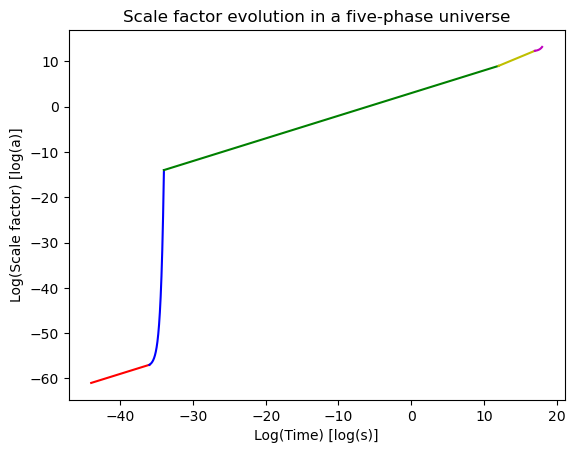

In [77]:
a_i = 1e-57
t_i = 1e-36  # begining of inflationary period
t_f = 1e-34  # end of inflationary period
H_i = 1e36  # Hubble constant at the beginning of inflation in s^-1
H_0 = 2.2e-18  # Hubble constant today in s^-1

t1 = np.linspace(1e-44, t_i, 1000)
a1 = a_i * (t1 / t_i)**(1 / 2)  # phase one - radiation dominated for t < t_i

t2 = np.linspace(t_i, t_f, 1000)
a2_start = a1[-1]
a2 = a2_start * np.exp(H_i * (t2 - t_i))  # phase two - inflation

t3 = np.linspace(t_f, 1e12, 1000)
a3_start = a2[-1]
a3 = a3_start * (t3 / t_f)**(1 / 2)  # phase three - reheating and radiation dominated

t4 = np.linspace(1e12, 1e17, 1000)
a4_start = a3[-1]
a4 = a4_start * (t4 / t3[-1])**(2 / 3)  # phase four - matter era

t5 = np.linspace(1e17, 1e18, 1000)
a5_start = a4[-1]
a5 = a5_start * np.exp(H_0 * (t5 - t5[0]))  # phase five - dark energy era

# Combine time and scale factor arrays
#t = np.concatenate([t1, t2, t3, t4, t5])
#a = np.concatenate([a1, a2, a3, a4, a5])

# Create the plot
plt.plot(np.log10(t1), np.log10(a1), color='r', label='Radiation dominated')
plt.plot(np.log10(t2), np.log10(a2), color='b', label='Inflation')
plt.plot(np.log10(t3), np.log10(a3), color='g', label='Reheating')
plt.plot(np.log10(t4), np.log10(a4), color='y', label='Matter era')
plt.plot(np.log10(t5), np.log10(a5), color='m', label='Dark energy era')
plt.xlabel("Log(Time) [log(s)]")
plt.ylabel("Log(Scale factor) [log(a)]")
plt.title("Scale factor evolution in a five-phase universe")
plt.show()


#### V2 with normalisation to offset the curve so that the log of the scale factor is zero at t = 10^18

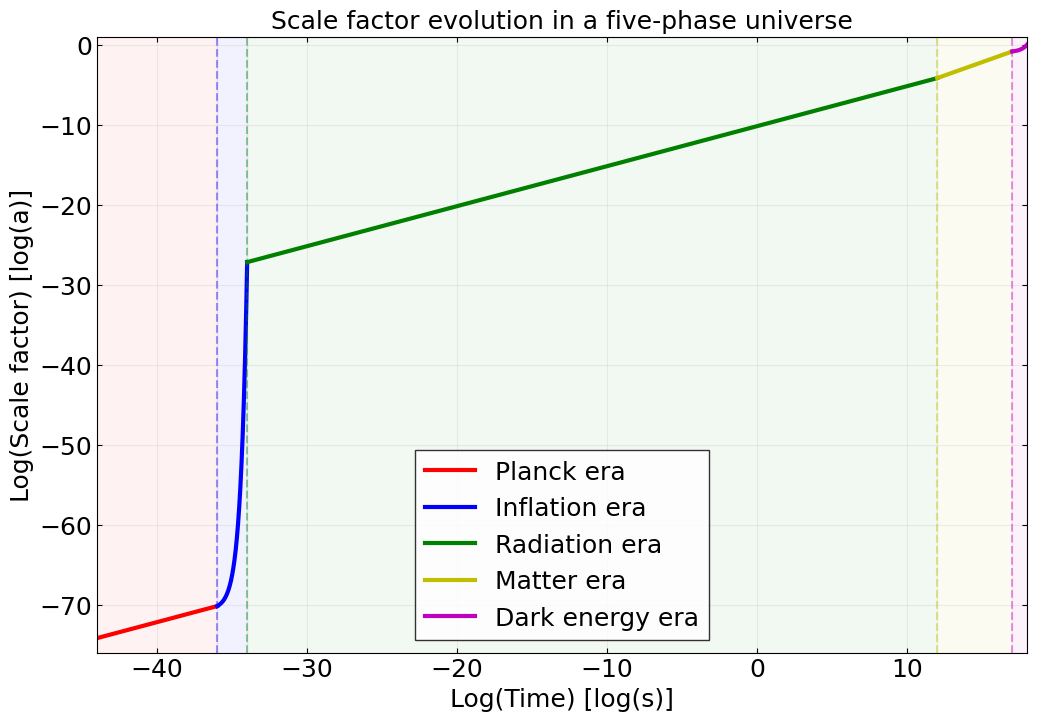

In [183]:
a_i = 1e-57
t_i = 1e-36  # begining of inflationary period
t_f = 1e-34  # end of inflationary period
H_i = 1e36  # Hubble constant at the beginning of inflation in s^-1
H_0 = 2.2e-18  # Hubble constant today in s^-1
t_now = 10**18

t1 = np.linspace(1e-44, t_i, 1000)
a1 = a_i * (t1 / t_i)**(1 / 2)  # phase one - radiation dominated for t < t_i

t2 = np.linspace(t_i, t_f, 1000)
a2_start = a1[-1]
a2 = a2_start * np.exp(H_i * (t2 - t_i))  # phase two - inflation

t3 = np.linspace(t_f, 1e12, 1000)
a3_start = a2[-1]
a3 = a3_start * (t3 / t_f)**(1 / 2)  # phase three - reheating and radiation dominated

t4 = np.linspace(1e12, 1e17, 1000)
a4_start = a3[-1]
a4 = a4_start * (t4 / t3[-1])**(2 / 3)  # phase four - matter era

t5 = np.linspace(1e17, t_now, 1000)
a5_start = a4[-1]
a5 = a5_start * np.exp(H_0 * (t5 - t5[0]))  # phase five - dark energy era

# observable horizon
t6 = np.linspace(1e-44, 1e18, 1000)
a6 = 3e8 * t6

# Calculate scale factor at t=18
a_now = a5[-1]

# Normalize scale factors
a1 /= a_now
a2 /= a_now
a3 /= a_now
a4 /= a_now
a5 /= a_now

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.log10(t1), np.log10(a1), color='r', label='Planck era', lw=3)
ax.axvspan(np.log10(t1[0]), np.log10(t1[-1]), alpha=0.05, color='red')
ax.axvline(np.log10(t_i), color='b', ls='--', lw=1.5, alpha=0.4)
ax.axvspan(np.log10(t2[0]), np.log10(t2[-1]), alpha=0.05, color='b')
ax.plot(np.log10(t2), np.log10(a2), color='b', label='Inflation era', lw=3)
ax.axvspan(np.log10(t3[0]), np.log10(t3[-1]), alpha=0.05, color='g')
ax.axvline(np.log10(t_f), color='g', ls='--', lw=1.5, alpha=0.4)
ax.plot(np.log10(t3), np.log10(a3), color='g', label='Radiation era', lw=3)
ax.axvline(np.log10(t3[-1]), color='y', ls='--', lw=1.5, alpha=0.4)
ax.plot(np.log10(t4), np.log10(a4), color='y', label='Matter era', lw=3)
ax.axvspan(np.log10(t4[0]), np.log10(t4[-1]), alpha=0.05, color='y')
ax.axvline(np.log10(t4[-1]), color='m', ls='--', lw=1.5, alpha=0.4)
ax.plot(np.log10(t5), np.log10(a5), color='m', label='Dark energy era', lw=3)
ax.axvspan(np.log10(t5[0]), np.log10(t5[-1]), alpha=0.05, color='m')
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=18)
plt.xlim(-44, 18)
plt.ylim(-76, 1)

plt.xlabel("Log(Time) [log(s)]", fontsize=18)
plt.ylabel("Log(Scale factor) [log(a)]", fontsize=18)
plt.title("Scale factor evolution in a five-phase universe", fontsize=18)
plt.grid(alpha=0.2)
plt.legend(fontsize=18, fancybox=False, edgecolor='k')
plt.show()

In [181]:
a1[0]

6.480520429934273e-75

## Part (III)

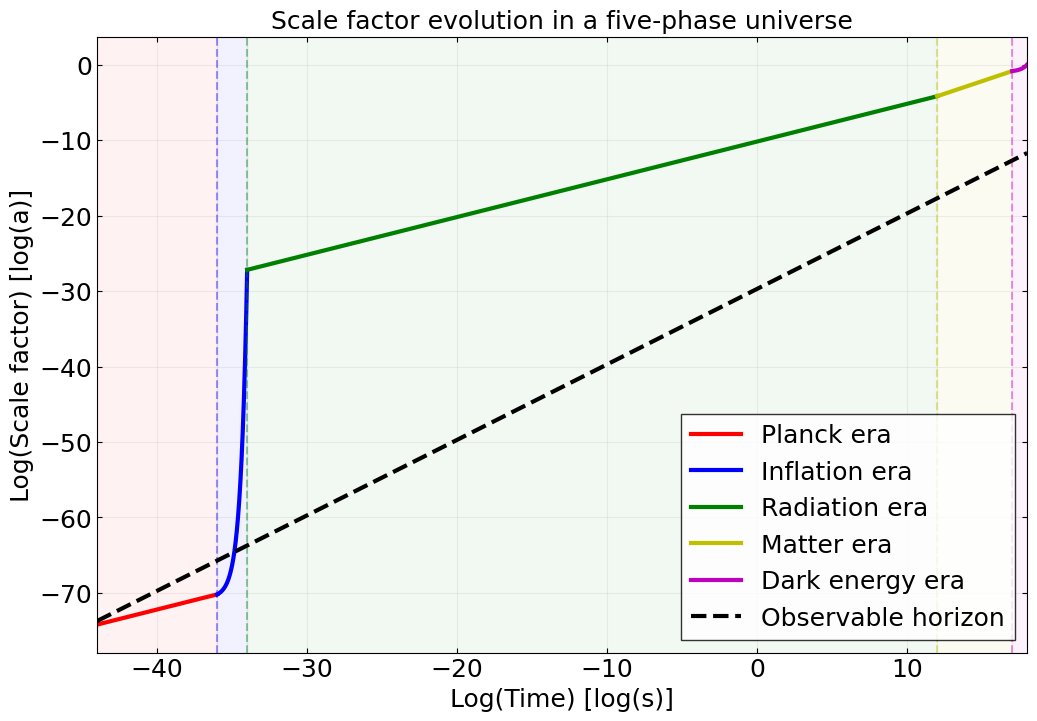

In [217]:
a_i = 1e-57
t_i = 1e-36  # begining of inflationary period
t_f = 1e-34  # end of inflationary period
H_i = 1e36  # Hubble constant at the beginning of inflation in s^-1
H_0 = 2.2e-18  # Hubble constant today in s^-1
t_now = 1e18

t1 = np.linspace(1e-44, t_i, 1000)
a1 = a_i * (t1 / t_i)**(1 / 2)  # phase one - radiation dominated for t < t_i

t2 = np.linspace(t_i, t_f, 1000)
a2_start = a1[-1]
a2 = a2_start * np.exp(H_i * (t2 - t_i))  # phase two - inflation

t3 = np.linspace(t_f, 1e12, 1000)
a3_start = a2[-1]
a3 = a3_start * (t3 / t_f)**(1 / 2)  # phase three - reheating and radiation dominated

t4 = np.linspace(1e12, 1e17, 1000)
a4_start = a3[-1]
a4 = a4_start * (t4 / t3[-1])**(2 / 3)  # phase four - matter era

t5 = np.linspace(1e17, t_now, 1000)
a5_start = a4[-1]
a5 = a5_start * np.exp(H_0 * (t5 - t5[0]))  # phase five - dark energy era

# observable horizon
t6 = np.linspace(1e-44, 1e18, 1000)
a6 = 3e8 * t6 * 1e-25 # multiply by prefactor to start at the 'right' point

# Calculate scale factor at t=18
a_now = a5[-1]

# Normalize scale factors
a1 /= a_now
a2 /= a_now
a3 /= a_now
a4 /= a_now
a5 /= a_now
a6 /= a_now


# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.log10(t1), np.log10(a1), color='r', label='Planck era', lw=3)
ax.axvspan(np.log10(t1[0]), np.log10(t1[-1]), alpha=0.05, color='red')
ax.axvline(np.log10(t_i), color='b', ls='--', lw=1.5, alpha=0.4)
ax.axvspan(np.log10(t2[0]), np.log10(t2[-1]), alpha=0.05, color='b')
ax.plot(np.log10(t2), np.log10(a2), color='b', label='Inflation era', lw=3)
ax.axvspan(np.log10(t3[0]), np.log10(t3[-1]), alpha=0.05, color='g')
ax.axvline(np.log10(t_f), color='g', ls='--', lw=1.5, alpha=0.4)
ax.plot(np.log10(t3), np.log10(a3), color='g', label='Radiation era', lw=3)
ax.axvline(np.log10(t3[-1]), color='y', ls='--', lw=1.5, alpha=0.4)
ax.plot(np.log10(t4), np.log10(a4), color='y', label='Matter era', lw=3)
ax.axvspan(np.log10(t4[0]), np.log10(t4[-1]), alpha=0.05, color='y')
ax.axvline(np.log10(t4[-1]), color='m', ls='--', lw=1.5, alpha=0.4)
ax.plot(np.log10(t5), np.log10(a5), color='m', label='Dark energy era', lw=3)
ax.axvspan(np.log10(t5[0]), np.log10(t5[-1]), alpha=0.05, color='m')
ax.plot(np.log10(t6), np.log10(a6), color='k', label='Observable horizon', lw=3, ls='--')
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=18)
plt.xlim(-44, 18)

plt.xlabel("Log(Time) [log(s)]", fontsize=18)
plt.ylabel("Log(Scale factor) [log(a)]", fontsize=18)
plt.title("Scale factor evolution in a five-phase universe", fontsize=18)
plt.grid(alpha=0.2)
plt.legend(fontsize=18, fancybox=False, edgecolor='k', loc='lower right')
plt.show()

# Question 4

#### Part (I)

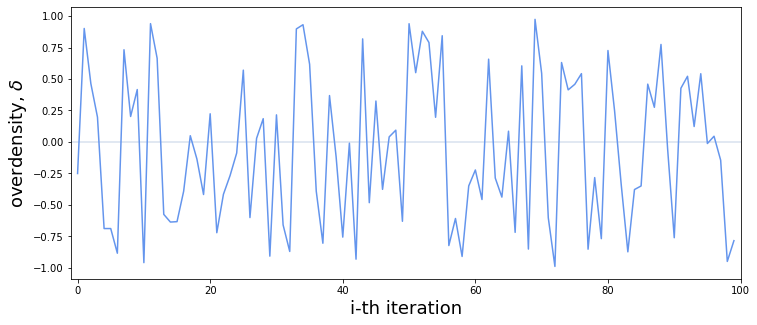

In [9]:
np.random.seed(42) # set seed for reproducibility
num_samples = 100
x = np.random.uniform(-1, 1, num_samples)

# plot results
plt.figure(figsize=(12, 5))
plt.axhline(0, color='lightsteelblue', linestyle='-', alpha=0.5)
plt.xlim(-1, 100)
plt.plot(x, color='cornflowerblue')
plt.xlabel('i-th iteration', fontsize=18)
plt.ylabel('overdensity, $\delta$', fontsize=18)
plt.show()

## Part (II)

Filter the data points with a top hat filter - this is equivalent to convolving the signal with a box shaped function.
We first create the 1D convolution kernel and then convolve it with the signal.

In [11]:
w1 = 3 # set window size ie. the number of points to average over
mask1=np.ones((1,w1))/w1
mask1=mask1[0,:]

w2 = 15 # set window size
mask2=np.ones((1,w2))/w2
mask2=mask2[0,:]
print(f'3 Pt. Running Av. Mask: {mask1}')
print(f'15 Pt. Running Av. Mask: {mask2}')

3 Pt. Running Av. Mask: [0.33333333 0.33333333 0.33333333]
15 Pt. Running Av. Mask: [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


Running average of 3 points, so mask is [1/3, 1/3, 1/3] as expected. Now let's plot the results:

In [12]:
convovled_3 = np.convolve(x, mask1, mode='same') # add padding of zeros around the boundaries to preserve the length 
convovled_15 = np.convolve(x, mask2, mode='same') # add padding of zeros around the boundaries to preserve the length

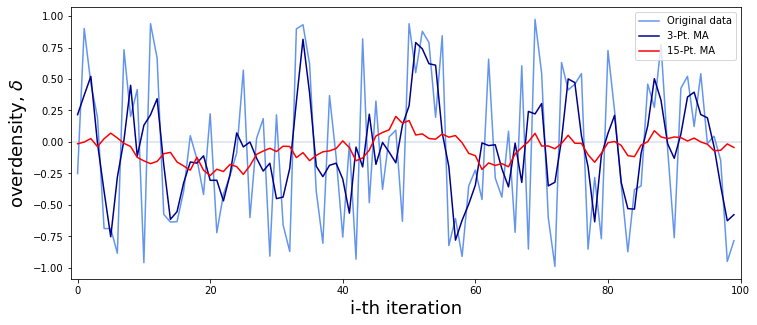

In [15]:
# plot results
plt.figure(figsize=(12, 5))
plt.axhline(0, color='lightsteelblue', linestyle='-', alpha=0.5)
plt.plot(x, color='cornflowerblue', label='Original data')
plt.plot(convovled_3, label='3-Pt. MA', color='darkblue')
plt.plot(convovled_15, label='15-Pt. MA', color='r')
plt.legend()
plt.xlabel('i-th iteration', fontsize=18)
plt.xlim(-1, 100)
plt.ylabel('overdensity, $\delta$', fontsize=18)
plt.show()

## Part(III)

We use a box-muller transformation to convert a uniform distribution to a Gaussian distribution. The general implementation for the 'basic' form is as follows:
First, we generate two random numbers, $U_1$ and $U_2$ from a unfiform distribution defined on the interval [0, 1].
We then define the following two random variables:
$$Z_1 = \sqrt{-2 ln U_1} \cos({2\pi U_2})$$
$$Z_2 = \sqrt{-2 ln U_1} \sin({2\pi U_2})$$
Here, $Z_0$ and $Z_1$ are independent random variables from a Gaussian distribution with mean 0 and variance 1.
The following code demonstrates a simple implementation of the box-muller transformation:

In [139]:
num_samples = 10000 # use large num of samples to get a smooth distribution
u1, u2 = np.random.uniform(0, 1, num_samples), np.random.uniform(0, 1, num_samples) # sample uniform random numbers
z1, z2 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2), np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2) # apply transformation

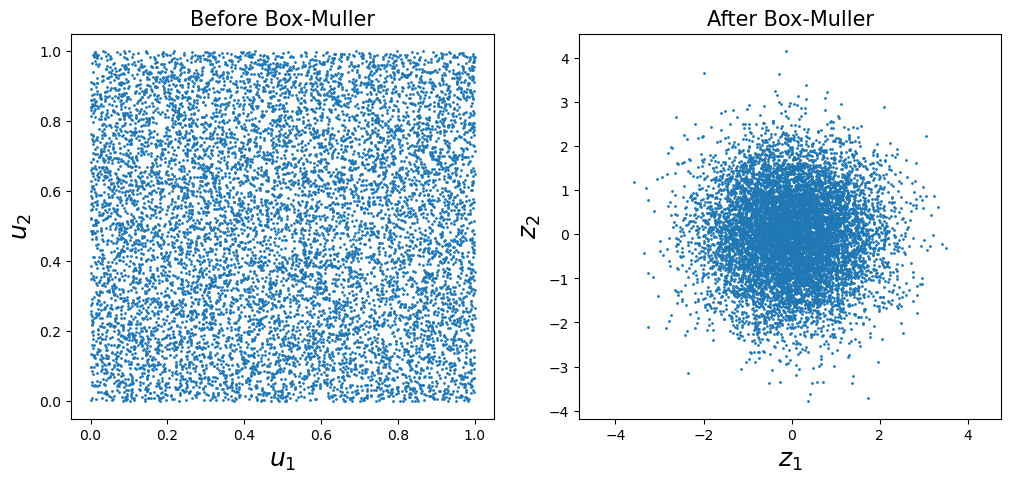

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.axis('equal')
ax[0].scatter(u1, u2, s=1)
ax[0].set_xlabel('$u_1$', fontsize=18)
ax[0].set_ylabel('$u_2$', fontsize=18)
ax[0].set_title('Before Box-Muller', fontsize=15)
ax[1].scatter(z0, z1, s=1)
ax[1].set_xlabel('$z_1$', fontsize=18)
ax[1].set_ylabel('$z_2$', fontsize=18)
ax[1].set_title('After Box-Muller', fontsize=15)
plt.show()

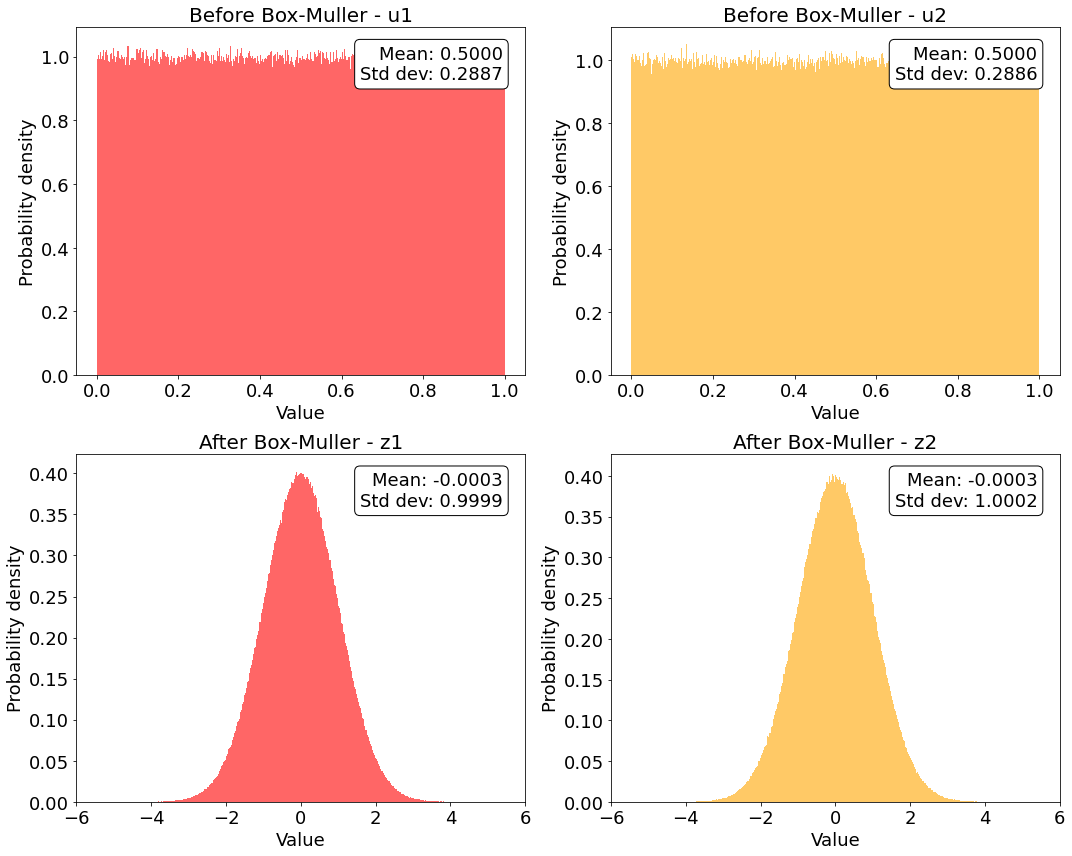

In [24]:
def box_muller(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2
np.random.seed(0)
n = int(5E6) # use lots of samples to get a smooth histogram
u1 = np.random.rand(n)
u2 = np.random.rand(n)
bins = 1000
text_box_props = dict(boxstyle='round, pad=0.3', facecolor='white', edgecolor='black')
z1, z2 = box_muller(u1, u2)
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.hist(u1, bins=bins, density=True, alpha=0.6, color='red')
plt.title("Before Box-Muller - u1", fontsize=20)
plt.xlabel("Value", fontsize=18)
plt.ylabel("Probability density", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
mean = np.mean(u1)
std_dev = np.std(u1)
plt.text(0.95, 0.95, f"Mean: {mean:.4f}\nStd dev: {std_dev:.4f}",
         ha='right', va='top', transform=plt.gca().transAxes, bbox=text_box_props, fontsize=18)
plt.subplot(2, 2, 2)
plt.hist(u2, bins=bins, density=True, alpha=0.6, color='orange')
plt.title("Before Box-Muller - u2", fontsize=20)
plt.xlabel("Value", fontsize=18)
plt.ylabel("Probability density", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
mean = np.mean(u2)
std_dev = np.std(u2)
plt.text(0.95, 0.95, f"Mean: {mean:.4f}\nStd dev: {std_dev:.4f}",
         ha='right', va='top', transform=plt.gca().transAxes, bbox=text_box_props, fontsize=18)
plt.subplot(2, 2, 3)
plt.hist(z1, bins=bins, density=True, alpha=0.6, color='red')
plt.title("After Box-Muller - z1", fontsize=20)
plt.xlabel("Value", fontsize=18)
plt.ylabel("Probability density", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-6,6)
mean = np.mean(z1)
std_dev = np.std(z1)
plt.text(0.95, 0.95, f"Mean: {mean:.4f}\nStd dev: {std_dev:.4f}",
         ha='right', va='top', transform=plt.gca().transAxes, bbox=text_box_props, fontsize=18)
plt.subplot(2, 2, 4)
plt.hist(z2, bins=bins, density=True, alpha=0.6, color='orange')
plt.title("After Box-Muller - z2", fontsize=20)
plt.xlabel("Value", fontsize=18)
plt.ylabel("Probability density", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-6,6)
mean = np.mean(z2)
std_dev = np.std(z2)
plt.text(0.95, 0.95, f"Mean: {mean:.4f}\nStd dev: {std_dev:.4f}",
         ha='right', va='top', transform=plt.gca().transAxes, bbox=text_box_props, fontsize=18)
plt.tight_layout()
#plt.savefig("box_muller.png", dpi=800)
plt.show()

Examine statistics:

In [25]:
print('Mean of u1, u2: ', np.mean(u1), np.mean(u2))
print('Var. of u1, u2: ', np.std(u1)**2, np.std(u2)**2)

print('Mean of z1, z2: ', np.mean(z1), np.mean(z2))
print('Var. of z1, z2: ', np.std(z1)**2, np.std(z2)**2)


Mean of u1, u2:  0.49999779693138247 0.5000013224618358
Var. of u1, u2:  0.08334439847867633 0.08331827768947965
Mean of z1, z2:  -0.0002887226925288272 -0.0002554560605591619
Var. of z1, z2:  0.9998864197939537 1.000437784228496


This is what we would expect for a Gaussia distribution of mean 0 and variance 1.

## Part (IV)

Here we repeat the same process as in part (II) but with a Gaussian filter. We first create the Gaussian function and then convolve it with the signal.

In [85]:
from scipy.ndimage import gaussian_filter1d

In [94]:
gaussian_filtered = gaussian_filter1d(x, sigma=1, mode='constant', cval=0.0) # for consistency, add padding of zeros around the boundaries to preserve the length

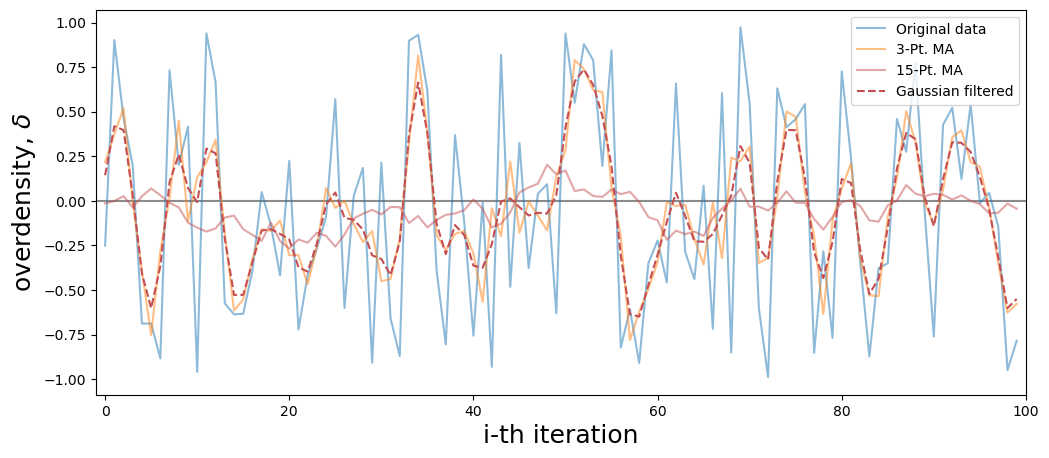

In [106]:
# plot results
plt.figure(figsize=(12, 5))
plt.axhline(0, color='k', linestyle='-', alpha=0.5)
plt.plot(x, label='Original data', alpha=0.5)
plt.plot(convovled_3, label='3-Pt. MA', alpha=0.5)
plt.plot(convovled_15, label='15-Pt. MA', color='r', alpha=0.5)
plt.plot(gaussian_filtered, label='Gaussian filtered', color='r', linestyle='--')
plt.legend()
plt.xlabel('i-th iteration', fontsize=18)
plt.xlim(-1, 100)
plt.ylabel('overdensity, $\delta$', fontsize=18)
plt.show()